In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [37]:
file_path = 'results.csv'
data = pd.read_csv(file_path)

# Filter for generation 200 and remove rows with 1000 in latency or energy
filtered_data = data[(data['generations'] == 200) &
                           (data['latency'] != 1000) &
                           (data['energy'] != 1000)]

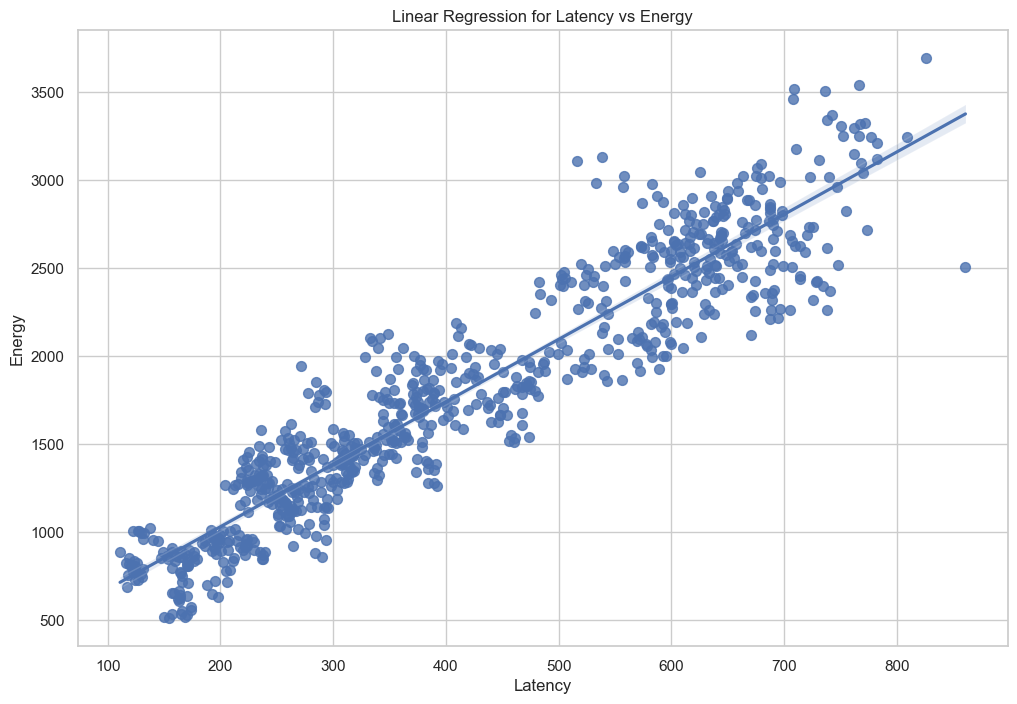

In [38]:
# Creating a scatter plot with a linear regression line for the newest data
plt.figure(figsize=(12, 8))
sns.regplot(x='latency', y='energy', data=filtered_data, scatter_kws={'s':50})
plt.title('Linear Regression for Latency vs Energy')
plt.xlabel('Latency')
plt.ylabel('Energy')
plt.show()

/var/folders/0c/45yxrbkn6sx_nd6pdck7bc940000gn/T/ipykernel_87546/469768359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['weighted_latency'] = filtered_data['latency'] * filtered_data['alpha']
/var/folders/0c/45yxrbkn6sx_nd6pdck7bc940000gn/T/ipykernel_87546/469768359.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['weighted_energy'] = filtered_data['energy'] * filtered_data['beta']


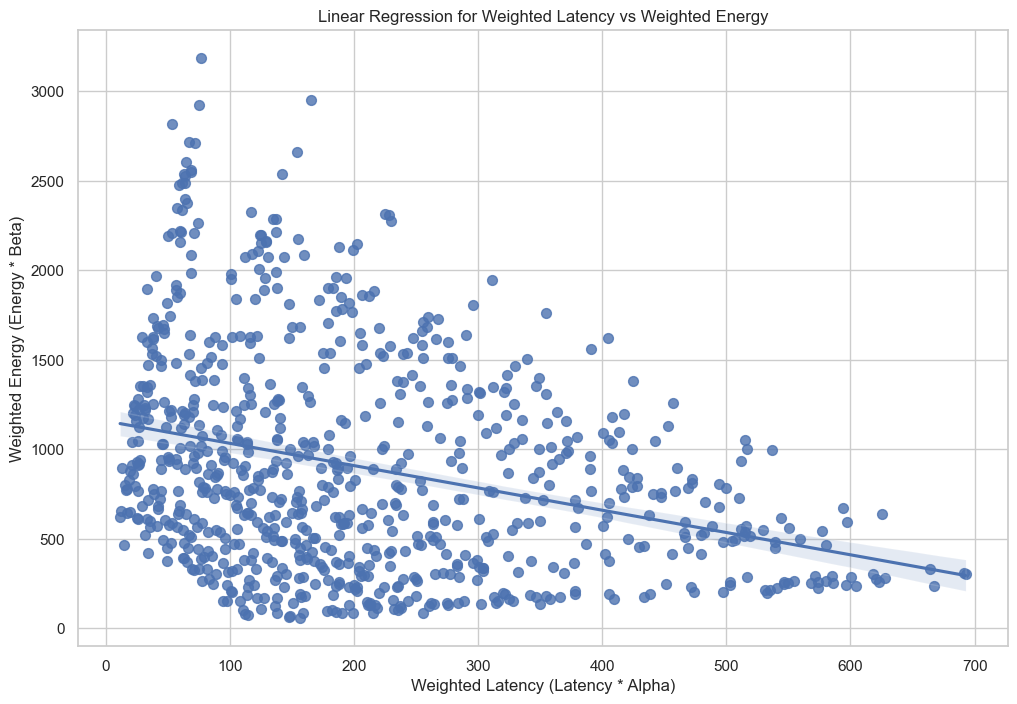

In [41]:
# Creating new columns for weighted latency and energy
filtered_data['weighted_latency'] = filtered_data['latency'] * filtered_data['alpha']
filtered_data['weighted_energy'] = filtered_data['energy'] * filtered_data['beta']

# Creating a scatter plot with a linear regression line for weighted latency vs weighted energy
plt.figure(figsize=(12, 8))
sns.regplot(x='weighted_latency', y='weighted_energy', data=filtered_data, scatter_kws={'s':50})
plt.title('Linear Regression for Weighted Latency vs Weighted Energy')
plt.xlabel('Weighted Latency (Latency * Alpha)')
plt.ylabel('Weighted Energy (Energy * Beta)')
plt.show()

/var/folders/0c/45yxrbkn6sx_nd6pdck7bc940000gn/T/ipykernel_87546/1718818332.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['weighted_latency'] = filtered_data['latency'] * filtered_data['alpha']
/var/folders/0c/45yxrbkn6sx_nd6pdck7bc940000gn/T/ipykernel_87546/1718818332.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['weighted_energy'] = filtered_data['energy'] * filtered_data['beta']


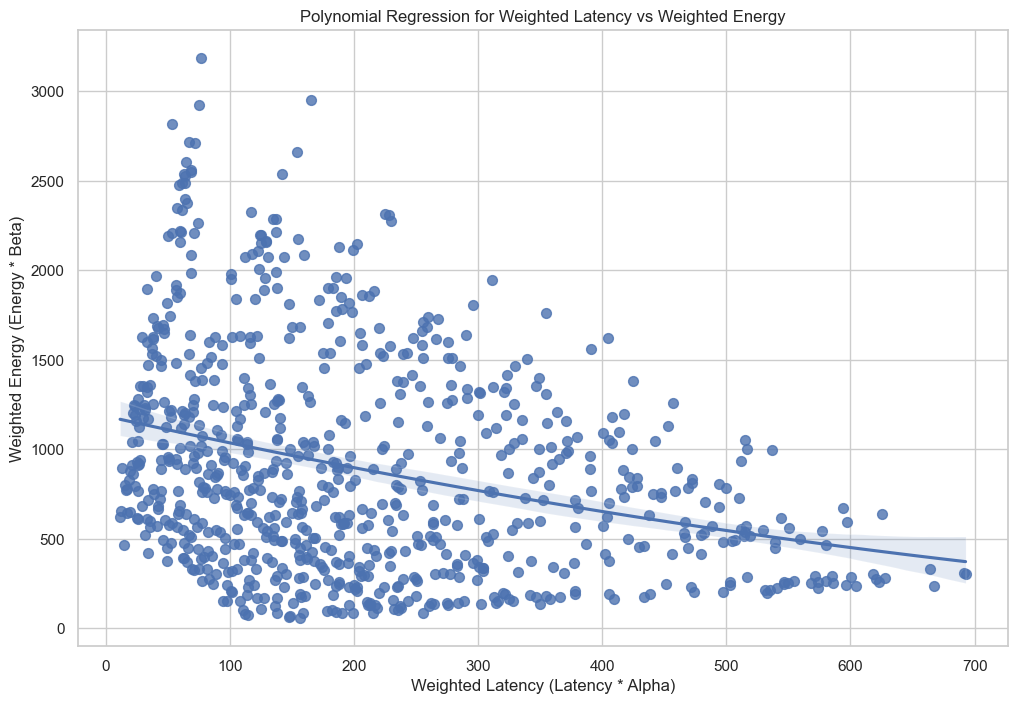

In [42]:
# Creating new columns for weighted latency and energy
filtered_data['weighted_latency'] = filtered_data['latency'] * filtered_data['alpha']
filtered_data['weighted_energy'] = filtered_data['energy'] * filtered_data['beta']

# Creating a scatter plot with a polynomial regression line for weighted latency vs weighted energy
plt.figure(figsize=(12, 8))
sns.regplot(x='weighted_latency', y='weighted_energy', data=filtered_data, order=2, scatter_kws={'s':50})
plt.title('Polynomial Regression for Weighted Latency vs Weighted Energy')
plt.xlabel('Weighted Latency (Latency * Alpha)')
plt.ylabel('Weighted Energy (Energy * Beta)')
plt.show()

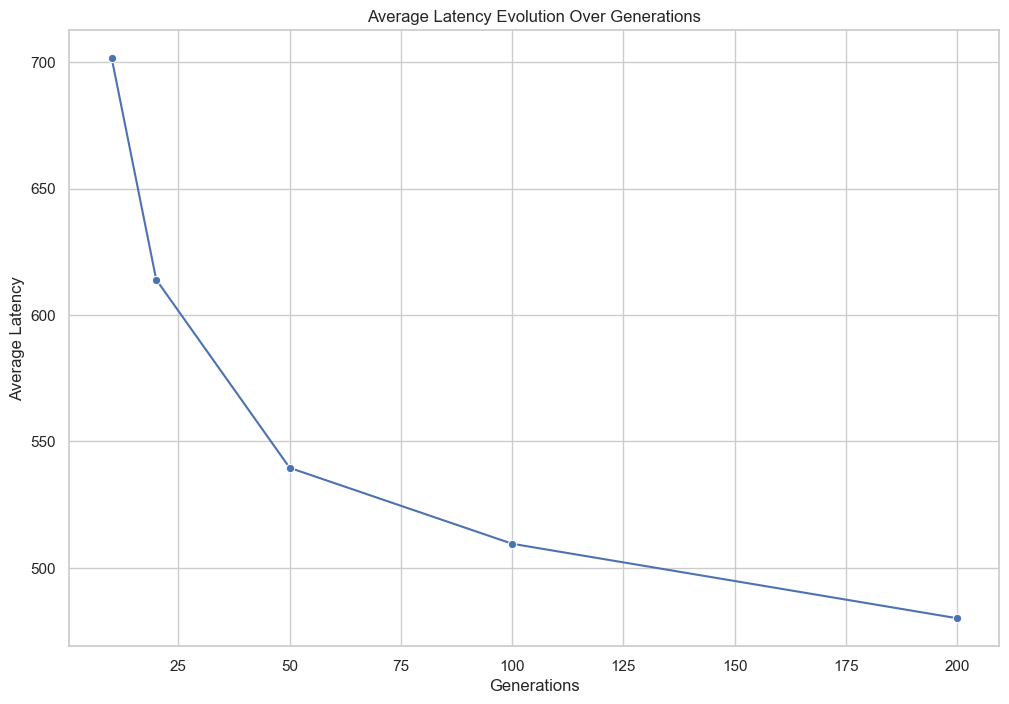

In [45]:
# Calculating the average latency for each generation
avg_latency_per_generation = data.groupby('generations')['latency'].mean().reset_index()

# Creating a line chart to show how latency evolves over generations
plt.figure(figsize=(12, 8))
sns.lineplot(x='generations', y='latency', data=avg_latency_per_generation, marker='o')
plt.title('Average Latency Evolution Over Generations')
plt.xlabel('Generations')
plt.ylabel('Average Latency')
plt.show()

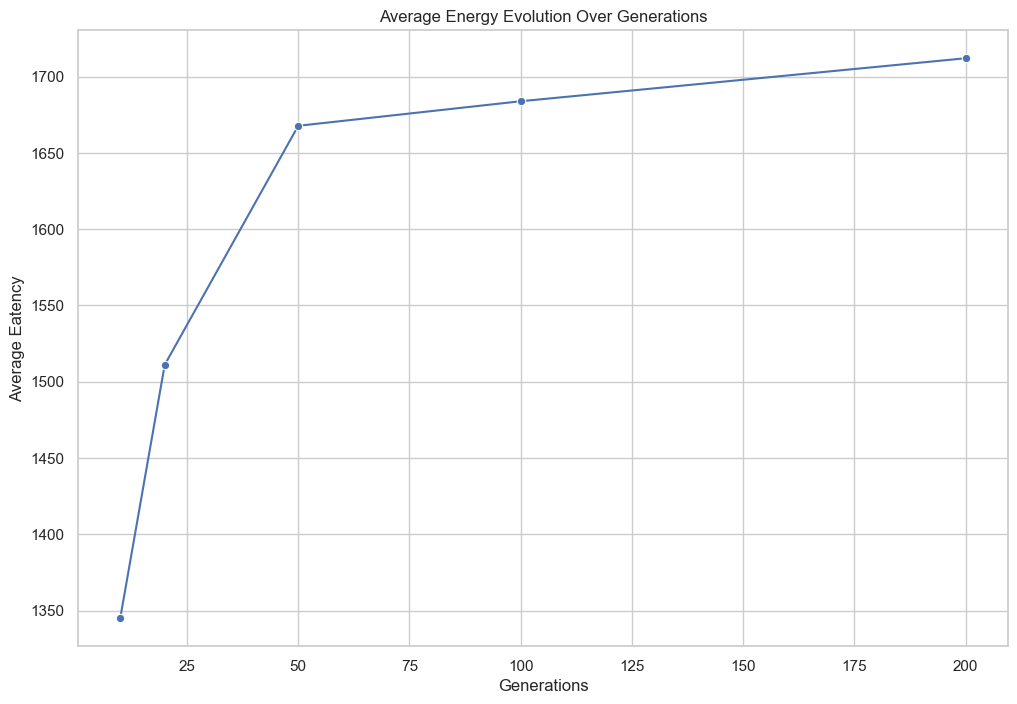

In [46]:
# Calculating the average energy for each generation
avg_energy_per_generation = data.groupby('generations')['energy'].mean().reset_index()

# Creating a line chart to show how energy evolves over generations
plt.figure(figsize=(12, 8))
sns.lineplot(x='generations', y='energy', data=avg_energy_per_generation, marker='o')
plt.title('Average Energy Evolution Over Generations')
plt.xlabel('Generations')
plt.ylabel('Average Energy')
plt.show()